In [1]:
import numpy as np
from enum import Enum
from matplotlib import pyplot as pp
import matplotlib.pyplot as pp

mu=500 #reduced mass of the dipartcle system
i_lbd_bg1=500 #number of Lambda samples [500 for Dataset 1, 50 for Dataset 2]
i_gamma=1000 #number of gamma samples [used for Dataset 1 only]
# i_lbd_bg and i_gamma I decrease to 50 and 100 respectively to reduce the total number samples to 20 000
# this, however, apparently leads to inbalanced gamma sampling (more virtual states than bound states)
i_lbd_bg2=50
i_alfa=10
i_beta=10

class DataSet(Enum):
    one=1
    two=2

def delta_bg(p,eta,lbd_bg):
    return eta*np.arctan(p/lbd_bg)

def S1(p,eta,lbd_bg,gam):
    dlt=delta_bg(p,eta,lbd_bg)
    return np.exp(2j*dlt)*(-(p+1j*gam)/(p-1j*gam))

def f1(E,eta,lbd_bg,gam):
    p = np.sqrt(2 * mu * E)
    np.seterr(invalid="ignore")
    return np.where(p<0.0000001,eta/lbd_bg,(S1(p,eta,lbd_bg,gam)-1.0)/(2j*p))

def S2(p,eta,lbd_bg,alfa,beta):
    return np.exp(2j*delta_bg(p,eta,lbd_bg))*((p-1j*beta)**2-alfa**2)/((p+1j*beta)**2-alfa**2)

def f2(E,eta,lbd_bg,alfa,beta):
    p = np.sqrt(2 * mu * E)
    np.seterr(invalid="ignore")
    return np.where(p<0.0000001,eta/lbd_bg,(S2(p,eta,lbd_bg,alfa,beta)-1.0)/(2j*p))


E=np.arange(0+0.5,100+0.5,0.5)
mom=np.sqrt(2*mu*E)

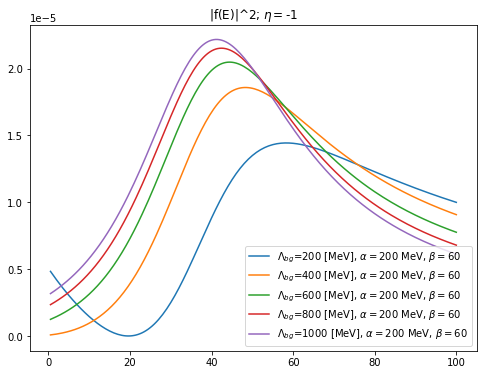

In [2]:
eta=-1
pp.figure(figsize=(8,6))
pp.title(r"|f(E)|^2; $\eta=$"+str(eta))
for lbd in (np.arange(200,1200,200)):
    alpha2=200
    beta2=60
    pp.plot(E,np.abs(f2(E,eta,lbd,alpha2,beta2))**2,
            label=r'$\Lambda_{bg}$='+str(lbd)+r" [MeV], $\alpha=$"+str(alpha2)+r" MeV, $\beta=$"+str(beta2))
    pp.legend()

pp.show()

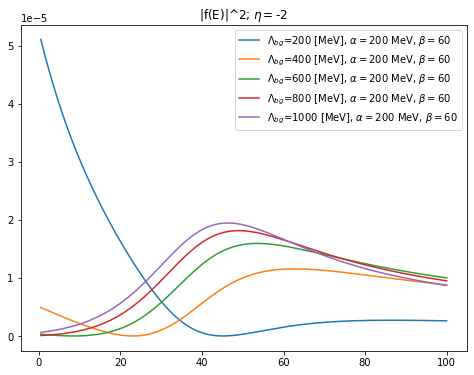

In [3]:
eta=-2
pp.figure(figsize=(8,6))
pp.title(r"|f(E)|^2; $\eta=$"+str(eta))
for lbd in (np.arange(200,1200,200)):
    alpha2=200
    beta2=60
    pp.plot(E,np.abs(f2(E,eta,lbd,alpha2,beta2))**2,
            label=r'$\Lambda_{bg}$='+str(lbd)+r" [MeV], $\alpha=$"+str(alpha2)+r" MeV, $\beta=$"+str(beta2))
    pp.legend()

pp.show()